<a href="https://colab.research.google.com/github/wellennasci/projetos_portfolio/blob/main/An%C3%A1lise_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise Churn**

---
# **Informações gerais**

**Autora:** Wellen Nascimento

**Linkedin:** https://www.linkedin.com/in/wellen/

**Data:** 22/03/2024

---
#**Conhecendo os dados**

##Fonte dos Dados

https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset

O arquivo foi extraído do site Kaggle e consiste em registros de clientes que abrangem uma variedade de características e comportamentos. Cada registro representa um cliente e inclui informações como idade, sexo, posse, frequência de uso, chamadas de suporte, atraso de pagamento, tipo de assinatura, duração do contrato, gasto total e última interação.

Estes dados fornecem uma visão do relacionamento entre a empresa e seus clientes, permitindo uma análise detalhada do churn e insights sobre padrões de comportamento e preferências. Ao compreender melhor esses dados, podemos desenvolver estratégias eficazes de retenção de clientes e melhorar a experiência geral do cliente.

Vamos explorar mais a fundo esses dados e descobrir as tendências que podem nos ajudar a impulsionar o crescimento e o sucesso da empresa.


##Dicionário dos dados

**CustomerID (ID do Cliente):** Um identificador único atribuído a cada cliente na base de dados.

**Age (Idade do Cliente):** A idade do cliente registrada no momento da análise.

**Gender (Gênero):** O gênero do cliente, podendo ser masculino, feminino ou outra categoria, se aplicável.

**Tenure:** O período de tempo que o cliente permaneceu como assinante ou cliente da empresa, geralmente medido em meses.

**Usage (Uso):** A quantidade de uso ou consumo dos serviços ou produtos oferecidos pela empresa pelo cliente durante um determinado período de tempo.

**Frequency (Frequência):** A frequência com que o cliente utiliza os serviços ou produtos da empresa durante um determinado período de tempo.

**Support Calls (Chamadas de Suporte):** O número de chamadas de suporte ou assistência técnica feitas pelo cliente durante um período de tempo específico.

**Payment (Pagamento):** O método de pagamento utilizado pelo cliente para pagar pelos serviços ou produtos fornecidos pela empresa.

**Delay (Atraso):** Qualquer atraso no pagamento ou inadimplência do cliente em relação aos serviços ou produtos adquiridos.

**Subscription Type (Tipo de Assinatura):** O tipo de assinatura ou plano de serviço escolhido pelo cliente, por exemplo, plano básico, plano premium, etc.

**Contract Length (Duração do Contrato):** O período de tempo especificado pelo contrato de serviço entre a empresa e o cliente.

**Total Spend (Gasto Total):** O valor total gasto pelo cliente em serviços ou produtos da empresa durante o período de tempo considerado.

**Last Interaction (Última Interação):** A data da última interação registrada entre o cliente e a empresa, como uma compra, uma chamada de suporte, etc.

**Churn:** Variável binária que indica se o cliente cancelou o serviço ou produto da empresa (1 para churn, 0 para não churn).


In [2]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import chi2_contingency

In [3]:
dados_churn = pd.read_csv('customer_churn_dataset-training-master.csv')

#**Análise exploratória**


In [4]:
dados_churn.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [5]:
dados_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [6]:
# Estatísticas descritivas das variáveis numéricas
dados_churn.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [7]:

# Contagem de valores únicos para variáveis categóricas(aquelas que representam características qualitativas)
dados_churn['Contract Length'].value_counts()

Annual       177198
Quarterly    176530
Monthly       87104
Name: Contract Length, dtype: int64

In [8]:
dados_churn['Gender'].value_counts()

Male      250252
Female    190580
Name: Gender, dtype: int64

In [9]:
dados_churn['Subscription Type'].value_counts()

Standard    149128
Premium     148678
Basic       143026
Name: Subscription Type, dtype: int64

In [10]:
# Verificação de valores nulos
print(dados_churn.isnull().sum())

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


#**Limpeza dos dados**

In [11]:
dados_churn = dados_churn.dropna()

In [12]:
# Correção do valor 'Monthl' para 'Monthly'
dados_churn['Contract Length'] = dados_churn['Contract Length'].replace('Monthl', 'Monthly')

<ipython-input-12-80c05ea0eb96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_churn['Contract Length'] = dados_churn['Contract Length'].replace('Monthl', 'Monthly')


In [13]:
dados_churn['Contract Length'].value_counts()

Annual       177198
Quarterly    176530
Monthly       87104
Name: Contract Length, dtype: int64

In [14]:
# Padronização da coluna 'Gender'
# nota: o capitalize coloca o primeiro caractere convertido para maiúsculo e todos os outros caracteres convertidos para minúsculo
dados_churn['Gender'] = dados_churn['Gender'].str.capitalize()

# Padronização da coluna 'Subscription Type'
dados_churn['Subscription Type'] = dados_churn['Subscription Type'].str.capitalize()


In [15]:
dados_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 43.7+ MB


In [16]:
# Convertendo as colunas 'Gender' e 'Subscription Type' para o tipo categoria
dados_churn['Gender'] = dados_churn['Gender'].astype('category')
dados_churn['Subscription Type'] = dados_churn['Subscription Type'].astype('category')

In [17]:
dados_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   CustomerID         440832 non-null  float64 
 1   Age                440832 non-null  float64 
 2   Gender             440832 non-null  category
 3   Tenure             440832 non-null  float64 
 4   Usage Frequency    440832 non-null  float64 
 5   Support Calls      440832 non-null  float64 
 6   Payment Delay      440832 non-null  float64 
 7   Subscription Type  440832 non-null  category
 8   Contract Length    440832 non-null  object  
 9   Total Spend        440832 non-null  float64 
 10  Last Interaction   440832 non-null  float64 
 11  Churn              440832 non-null  float64 
dtypes: category(2), float64(9), object(1)
memory usage: 37.8+ MB


#**Análise Descritiva**

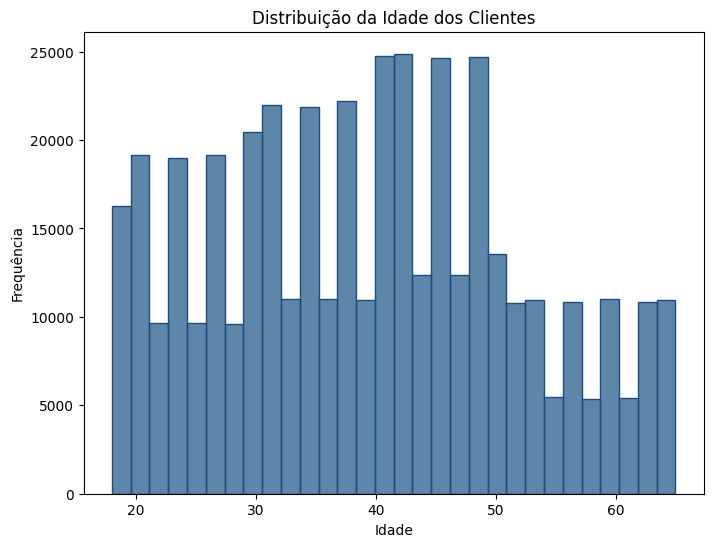

In [45]:
# Histograma da idade dos clientes com esquema de cores escuro
plt.figure(figsize=(8, 6))
sns.histplot(data=dados_churn, x='Age', bins=30, kde=False, color='#275D8C',edgecolor='#1E4C7B')
plt.title('Distribuição da Idade dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()


<ipython-input-19-122d03eaef1e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dados_churn.corr()


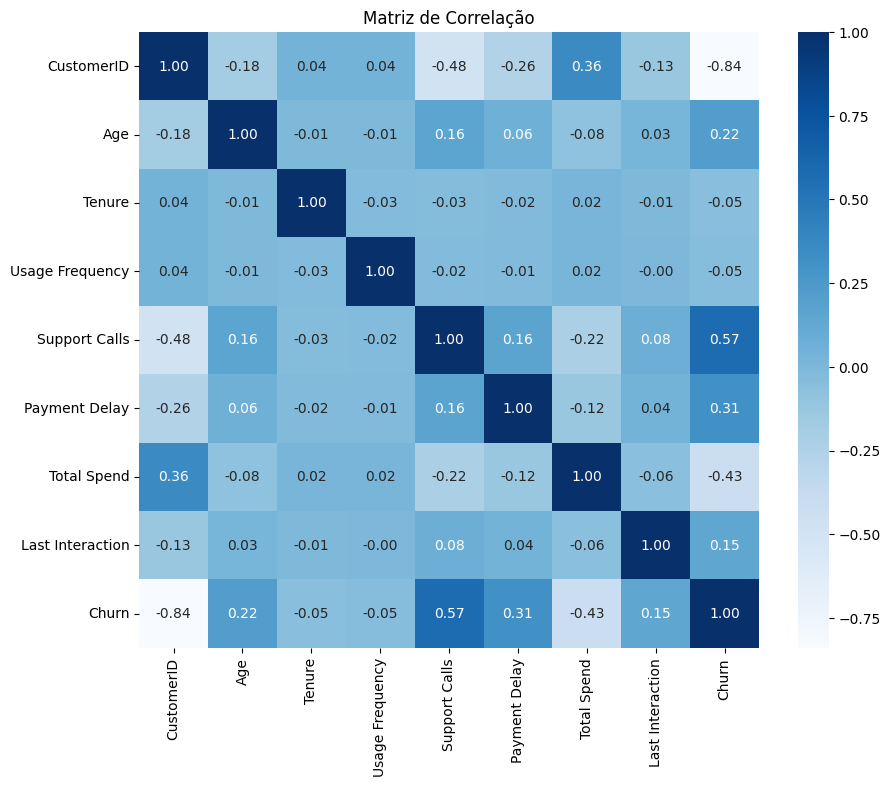

In [19]:
# Matriz de correlação
correlation_matrix = dados_churn.corr()

# Mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

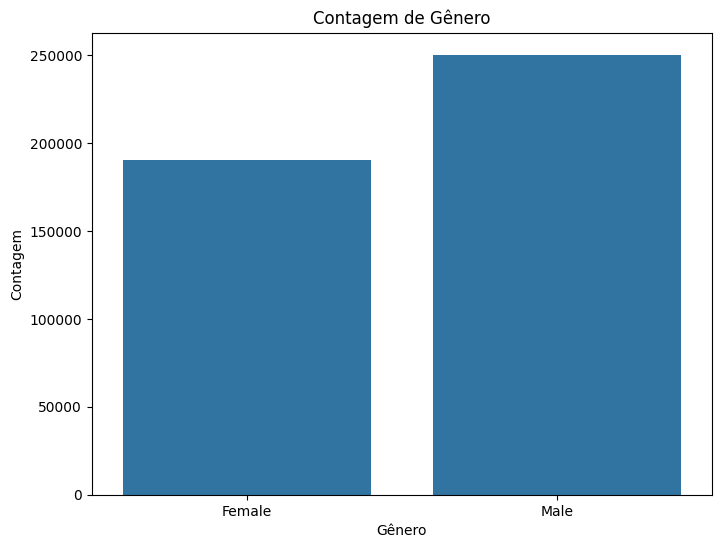

In [20]:
# Gráfico de contagem para variável 'Gender'
plt.figure(figsize=(8, 6))
sns.countplot(data=dados_churn, x='Gender', linewidth=0.2)
plt.title('Contagem de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()



Taxa de Churn Global: 56.71%


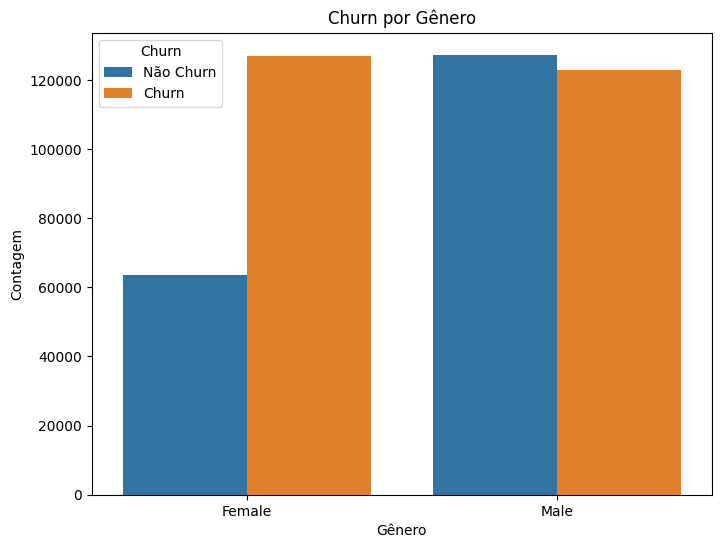

In [21]:
# Taxa de churn global
churn_rate = dados_churn['Churn'].mean() * 100
print(f'Taxa de Churn Global: {churn_rate:.2f}%')

# Análise de churn por gênero
plt.figure(figsize=(8, 6))
sns.countplot(data=dados_churn, x='Gender', hue='Churn')
plt.title('Churn por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.legend(title='Churn', labels=['Não Churn', 'Churn'])
plt.show()


#**Questões de Análise**
##Aqui estão algumas perguntas que busquei responder durante esta análise.


#**1.** Qual é a distribuição etária dos clientes? Há alguma faixa etária predominante?

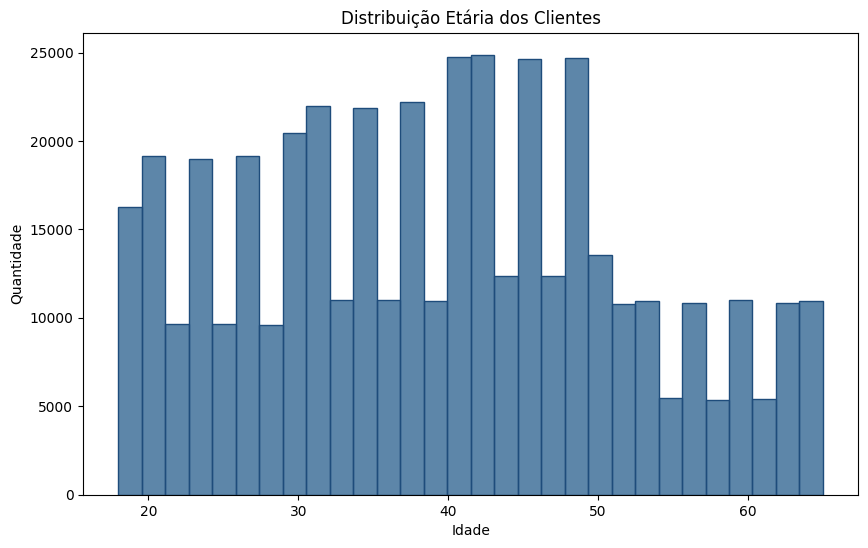

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dados_churn, x='Age', bins=30, kde=False, color='#275D8C', edgecolor='#1E4C7B')
plt.title('Distribuição Etária dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.grid(False)
plt.show()


In [23]:
media_idade = dados_churn['Age'].mean()
mediana_idade = dados_churn['Age'].median()
moda_idade = dados_churn['Age'].mode()[0]
desvio_padrao_idade = dados_churn['Age'].std()

print(f'Média de idade: {media_idade:.2f} anos')
print(f'Mediana de idade: {mediana_idade} anos')
print(f'Faixa etária predominante: {moda_idade} anos')
print(f'Desvio padrão de idade: {desvio_padrao_idade:.2f} anos')

Média de idade: 39.37 anos
Mediana de idade: 39.0 anos
Faixa etária predominante: 50.0 anos
Desvio padrão de idade: 12.44 anos


## Distribuição Etária dos Clientes

Ao analisar a distribuição etária dos clientes, observamos que tanto a média quanto a mediana de idade estão em torno de 39 anos. No entanto, a faixa etária predominante dos clientes, determinada pela moda da distribuição de idade, é de 50 anos. Além disso, o desvio padrão da idade dos clientes é de aproximadamente 12, sugerindo uma dispersão moderada em relação à idade média.

Esses resultados indicam que a maioria dos clientes está concentrada em torno da faixa etária de 50 anos, embora haja uma dispersão razoável em relação a essa idade média. Essas informações podem ser úteis para direcionar estratégias de marketing, desenvolvimento de produtos e serviços voltados para diferentes faixas etárias dentro da base de clientes.



#**2.** Qual é a distribuição de gênero dos clientes? Existem diferenças significativas entre homens e mulheres?

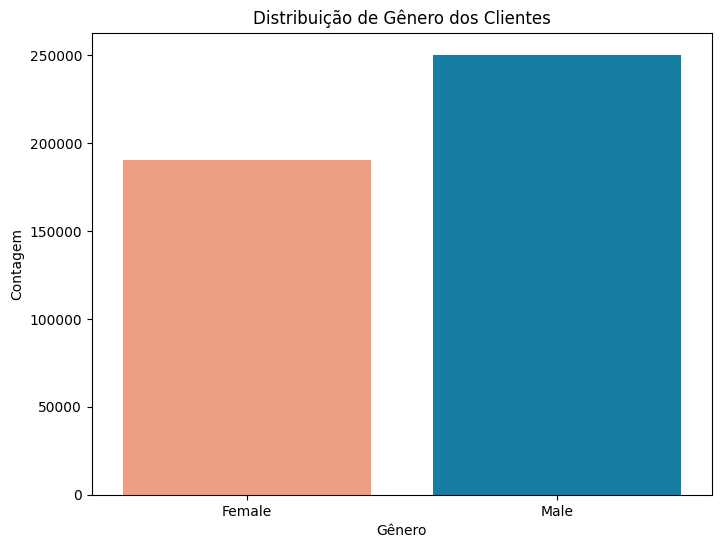

In [49]:
# Calculando a contagem de clientes para cada categoria de gênero
contagem_genero = dados_churn['Gender'].value_counts()

# Definindo as cores
cores = ['#FF9671', '#0089BA']

# Visualização da distribuição de gênero
plt.figure(figsize=(8, 6))
sns.barplot(x=contagem_genero.index, y=contagem_genero.values, hue=contagem_genero.index, palette=cores, dodge=False)
plt.title('Distribuição de Gênero dos Clientes')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()


In [50]:
# Analisando se existem diferenças significativas entre homens e mulheres
diferenca_genero = contagem_genero['Male'] - contagem_genero['Female']
if diferenca_genero > 0:
    print(f"Há {diferenca_genero} mais homens do que mulheres na base de clientes.")
elif diferenca_genero < 0:
    print(f"Há {abs(diferenca_genero)} mais mulheres do que homens na base de clientes.")
else:
    print("Não há diferenças significativas entre homens e mulheres na base de clientes.")

Há 59672 mais homens do que mulheres na base de clientes.


## Distribuição de Gênero dos Clientes

Ao analisar a distribuição de gênero dos clientes, observamos que há uma diferença de 59.672 a mais de homens do que mulheres na base de clientes. Isso sugere uma maior representação masculina na amostra analisada.

Essa informação é importante para entender a composição demográfica da base de clientes e pode influenciar estratégias de marketing e desenvolvimento de produtos voltados para diferentes segmentos de público. Ter um entendimento claro da distribuição de gênero permite à empresa adaptar suas estratégias para atender melhor às necessidades e preferências de seus clientes.


#**3.** Quanto tempo, em média, os clientes permanecem como assinantes ou clientes da empresa (Tenure)?

In [26]:
# Calculo da média do tempo de permanência
media_tenure = dados_churn['Tenure'].mean()
media_tenure_int = int(round(media_tenure))

print(f"Tempo médio de permanência dos clientes: {media_tenure_int} meses")


Tempo médio de permanência dos clientes: 31 meses


## Tempo Médio de Permanência dos Clientes

Ao analisar o tempo médio de permanência dos clientes, observamos que a média é de aproximadamente 31 meses. Isso significa que, em média, os clientes tendem a permanecer na empresa por cerca de 2 anos e meio antes de cancelarem o serviço ou produto.

#**4**. Como é a frequência de uso dos serviços ou produtos oferecidos pela empresa?

In [27]:
# Cálculo da frequência de uso
estatisticas_frequencia = dados_churn['Usage Frequency'].describe()
print(estatisticas_frequencia)

count    440832.000000
mean         15.807494
std           8.586242
min           1.000000
25%           9.000000
50%          16.000000
75%          23.000000
max          30.000000
Name: Usage Frequency, dtype: float64


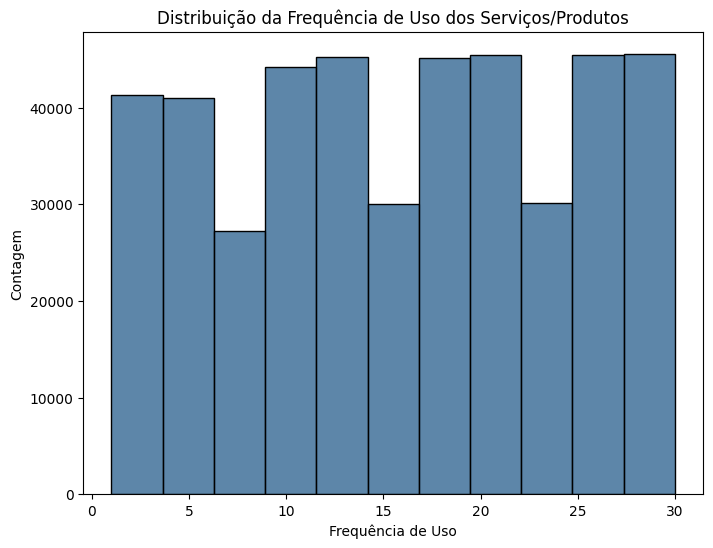

In [42]:
# Visualizar a distribuição da frequência de uso
plt.figure(figsize=(8, 6))
sns.histplot(dados_churn['Usage Frequency'], bins=11, kde=False, color='#275D8C')
plt.title('Distribuição da Frequência de Uso dos Serviços/Produtos')
plt.xlabel('Frequência de Uso')
plt.ylabel('Contagem')
plt.show()



## Frequência de Uso dos Serviços/Produtos

A análise da frequência de uso dos serviços ou produtos oferecidos pela empresa revela os seguintes insights:

- A média de frequência de uso é de aproximadamente 15.81 vezes, com um desvio padrão de 8.59. Isso sugere que, embora a média esteja próxima de 16, há uma dispersão significativa em torno desse valor. Isso indica que a frequência de uso não é uniformemente distribuída entre os clientes e pode haver diferenças nos padrões de comportamento.
- A distribuição dos dados é assimétrica, com maior densidade nos extremos mais baixos e mais altos da escala de frequência de uso. Em uma distribuição assimétrica, como essa, a média pode ser influenciada por valores extremos ou concentrações em torno de valores específicos.



#**5.** Quantas chamadas de suporte os clientes fazem em média?

In [29]:
media_chamadas_suporte = int(dados_churn['Support Calls'].mean())
print(f"Número médio de chamadas de suporte feitas pelos clientes: {media_chamadas_suporte}")


Número médio de chamadas de suporte feitas pelos clientes: 3


## Média de Chamadas de Suporte

Ao analisar o número de chamadas de suporte feitas pelos clientes, observamos que em média os clientes realizam aproximadamente 3 chamadas de suporte. Esse valor representa a média de interações dos clientes com o suporte técnico da empresa.




#**6.** Qual é o método de pagamento mais comum entre os clientes?

In [30]:
metodo_pagamento_comum = dados_churn['Payment Delay'].value_counts().idxmax()
print(f"O método de pagamento mais comum entre os clientes é: {metodo_pagamento_comum}")


O método de pagamento mais comum entre os clientes é: 12.0


#**7.** Qual é o tipo de assinatura mais comum entre os clientes?

In [31]:
tipo_assinatura_comum = dados_churn['Subscription Type'].value_counts().idxmax()
print(f"O tipo de assinatura mais comum entre os clientes é: {tipo_assinatura_comum}")


O tipo de assinatura mais comum entre os clientes é: Standard


#**8.** Qual é o comprimento médio do contrato entre a empresa e os clientes?

In [32]:
contagem_contratos = dados_churn['Contract Length'].value_counts()
print("Contagem de valores da coluna 'Contract Length':")
print(contagem_contratos)

Contagem de valores da coluna 'Contract Length':
Annual       177198
Quarterly    176530
Monthly       87104
Name: Contract Length, dtype: int64


In [33]:
# Atribuindo valores numéricos para cada tipo de contrato
valores_contratos = {"Monthly": 1, "Annual": 12, "Quarterly": 3}

# Calculando a média ponderada do comprimento do contrato
soma_pesos = sum(contagem_contratos[contrato] * valores_contratos[contrato] for contrato in contagem_contratos.index)
total_contratos = sum(contagem_contratos)

media_contrato = soma_pesos / total_contratos
media_arredondada = round(media_contrato)

print(f"A média do comprimento do contrato é de aproximadamente {media_arredondada} meses.")

A média do comprimento do contrato é de aproximadamente 6 meses.


#**9.** Qual é o gasto total médio dos clientes em serviços ou produtos da empresa?

In [34]:
media_gasto_total = dados_churn['Total Spend'].mean()
print(f'O gasto total médio dos clientes é de aproximadamente ${media_gasto_total:.2f}.')


O gasto total médio dos clientes é de aproximadamente $631.62.


#**10.** Qual é a data da última interação registrada entre os clientes e a empresa?


In [35]:
ultima_interacao = dados_churn['Last Interaction'].max()
print(f'A data da última interação registrada entre os clientes e a empresa é: {ultima_interacao}')


A data da última interação registrada entre os clientes e a empresa é: 30.0


## Última Interação com a Empresa

Ao analisar os dados, identifiquei que a data da última interação registrada entre os clientes e a empresa é representada como "30.0". Isso indica que a data mais recente registrada em nosso conjunto de dados é o dia 30 do mês.


#**11.** Qual é a taxa de churn (cancelamento de serviço) dos clientes?

In [36]:
churn_count = dados_churn['Churn'].sum()
total_clientes = len(dados_churn)

# Cálculo da taxa de churn
taxa_churn = churn_count / total_clientes

print("Taxa de churn dos clientes:", taxa_churn)


Taxa de churn dos clientes: 0.5671071972996515


## Taxa de Churn

A taxa de churn (cancelamento de serviço) dos clientes é de aproximadamente 0.56. Isso significa que mais da metade dos clientes cancelaram o serviço oferecido pela empresa durante o período da amostra analisada.

#**12.** Há alguma relação entre a idade dos clientes e a probabilidade de churn?

In [37]:
correlation = dados_churn['Age'].corr(dados_churn['Churn'])
print(f"Correlação entre Idade dos Clientes e Churn: {correlation}")


Correlação entre Idade dos Clientes e Churn: 0.218393918577108


In [38]:
# Calculando o coeficiente de correlação de Spearman
correlation, p_value = scipy.stats.spearmanr(dados_churn['Age'], dados_churn['Churn'])
print("Coeficiente de Correlação de Spearman:", correlation)
print("Valor-p:", p_value)


Coeficiente de Correlação de Spearman: 0.1961588060035336
Valor-p: 0.0


In [39]:
#teste qui-quadrado

# Criando uma tabela de contingência entre idade e churn
contingency_table = pd.crosstab(dados_churn['Age'], dados_churn['Churn'])

#teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Estatística Qui-Quadrado:", chi2)
print("Valor-p:", p)


Estatística Qui-Quadrado: 83259.17427063093
Valor-p: 0.0


## Relação entre Idade dos Clientes e Probabilidade de Churn

Ao analisar a relação entre a idade dos clientes e a probabilidade de churn, calculei dois indicadores estatísticos importantes: o coeficiente de correlação de Spearman e o teste Qui-Quadrado.

O coeficiente de correlação de Spearman resultou em um valor de aproximadamente 0.196, indicando uma correlação positiva fraca entre a idade dos clientes e a probabilidade de churn. No entanto, essa associação é estatisticamente significativa, como evidenciado pelo valor-p próximo a zero.

Além disso, realizei o teste Qui-Quadrado, que mostrou uma estatística Qui-Quadrado alta de cerca de 83259 e um valor-p praticamente zero. Isso confirma a existência de uma associação estatisticamente significativa entre a idade dos clientes e o churn.

Esses resultados sugerem que a idade dos clientes tem uma influência estatisticamente significativa na probabilidade de churn. No entanto, a correlação é relativamente fraca, o que indica que outros fatores podem estar desempenhando um papel mais forte na determinação do churn dos clientes.



#**13.** Como o gênero dos clientes influencia a taxa de churn?

Hipótese nula (H0): Não há associação entre o gênero dos clientes e a taxa de churn.

Hipótese alternativa (H1): Existe uma associação entre o gênero dos clientes e a taxa de churn.

In [40]:
#Teste de Hipóstese
# Criando uma tabela de contingência entre as variáveis Gênero e Churn
contingency_table = pd.crosstab(dados_churn['Gender'], dados_churn['Churn'])

# Realizando o teste qui-quadrado
chi2, p_valor, _, _ = chi2_contingency(contingency_table)

print(f"Valor qui-quadrado: {chi2}")
print(f"Valor-p: {p_valor}")


Valor qui-quadrado: 13560.734707741449
Valor-p: 0.0


**Resultado do Teste de Hipótese:**

Com base no resultado do teste qui-quadrado, que revelou um valor-p muito próximo de zero, podemos rejeitar a hipótese nula de que não há relação entre o gênero dos clientes e a taxa de churn. Isso indica que há uma associação estatisticamente significativa entre o gênero dos clientes e a probabilidade de cancelamento do serviço.

No entanto, é importante ressaltar que o teste qui-quadrado apenas confirma a presença de uma associação, mas não fornece informações sobre a direção ou a magnitude dessa associação. Portanto, análises adicionais são necessárias para entender melhor a natureza dessa relação. Isso pode incluir a comparação das taxas de churn entre diferentes grupos de gênero, análises de regressão para avaliar o impacto do gênero no churn controlando outras variáveis, e investigações qualitativas para identificar possíveis razões por trás das diferenças na taxa de churn entre homens e mulheres. Essas análises mais detalhadas podem fornecer insights valiosos para orientar estratégias de retenção de clientes e melhorar a experiência do cliente.


#**14.** Existem diferenças na taxa de churn entre os diferentes tipos de assinatura?

In [41]:
import pandas as pd

# Calcular a taxa de churn para cada tipo de assinatura
churn_rate = dados_churn.groupby('Subscription Type')['Churn'].mean()

# Exibir os resultados
print("Taxa de Churn por Tipo de Assinatura:")
print(churn_rate)


Taxa de Churn por Tipo de Assinatura:
Subscription Type
Basic       0.581782
Premium     0.559417
Standard    0.560700
Name: Churn, dtype: float64


## Taxa de Churn por Tipo de Assinatura

Ao analisar a taxa de churn por tipo de assinatura, notei que as diferenças entre elas são sutis. Embora existam variações entre as taxas de churn de cada tipo de assinatura, todas elas estão em uma faixa próxima. Isso sugere que as estratégias de retenção de clientes devem ser aplicadas de maneira equitativa em todos os tipos de assinatura para garantir a fidelidade do cliente.



